In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import models, layers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [3]:
# Load IMDB dataset with the 10,000 most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Combine training and test data
data = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)

In [4]:
print("Categories:", np.unique(labels))
print("Number of unique words:", len(np.unique(np.hstack(data))))

review_lengths = [len(x) for x in data]
print("Average Review Length:", np.mean(review_lengths))
print("Standard Deviation:", np.std(review_lengths))

Categories: [0 1]
Number of unique words: 9998
Average Review Length: 234.75892
Standard Deviation: 172.91149458735703


In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "#") for i in data[0]])
print("Sample Label (1 = Positive, 0 = Negative):", labels[0])

Sample Label (1 = Positive, 0 = Negative): 1


In [7]:
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

data = vectorize(data)
labels = np.array(labels).astype("float32")

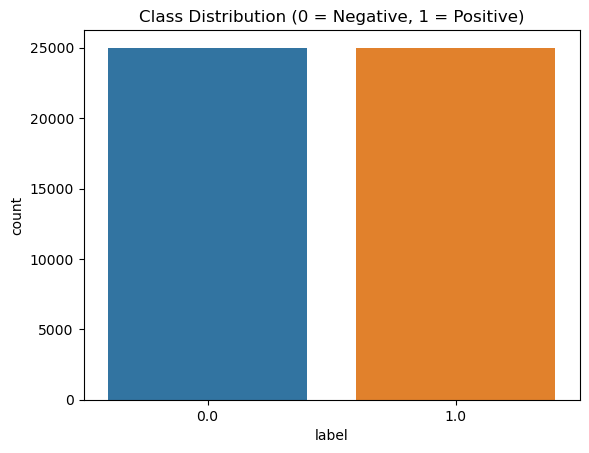

In [8]:
label_df = pd.DataFrame({'label': labels})
sns.countplot(x='label', data=label_df)
plt.title('Class Distribution (0 = Negative, 1 = Positive)')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=1)

In [9]:
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

C:\Users\dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │         500,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=512, validation_split=0.2)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9827 - loss: 0.0516 - val_accuracy: 0.8875 - val_loss: 0.4398
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9893 - loss: 0.0367 - val_accuracy: 0.8841 - val_loss: 0.5300
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9901 - loss: 0.0290 - val_accuracy: 0.8871 - val_loss: 0.6059
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9921 - loss: 0.0239 - val_accuracy: 0.8845 - val_loss: 0.6301
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9932 - loss: 0.0210 - val_accuracy: 0.8848 - val_loss: 0.6880


In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\nTest Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8832 - loss: 0.4137

Test Loss: 0.40516048669815063
Test Accuracy: 0.8885999917984009


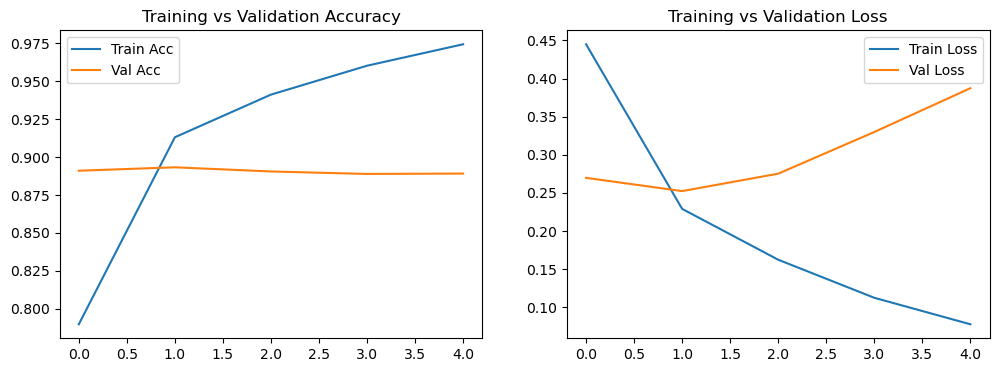

In [13]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()